In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

df.head()

Saving student_data.csv to student_data (1).csv


,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


Best gamma value: 10
Accuracy of Linear Kernel SVM: 0.92
Accuracy of RBF Kernel SVM: 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


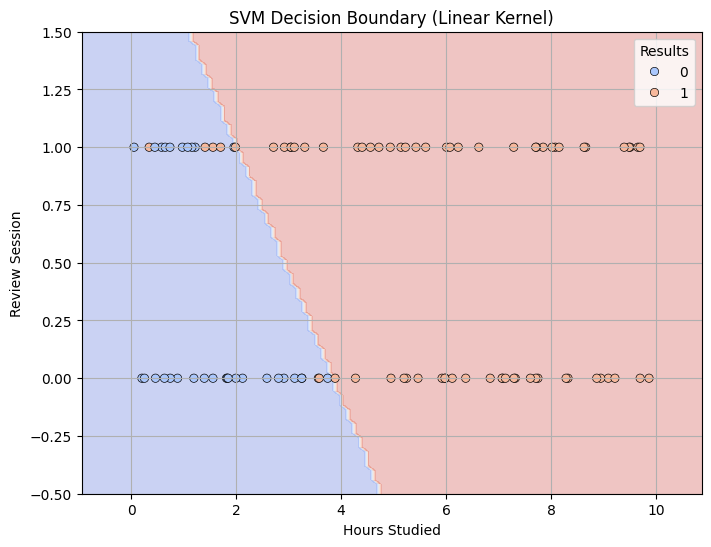

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


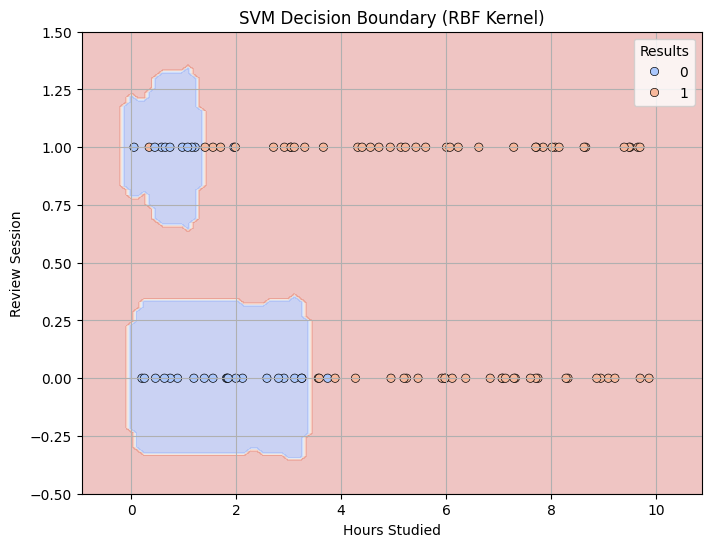

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df[["Hours_Studied", "Review_Session"]]
y = df["Results"]

# Train SVM with linear kernel
svm_linear = SVC(kernel="linear", probability=True)
svm_linear.fit(X, y)

# Predictions and accuracy for linear SVM
y_pred_linear = svm_linear.predict(X)
accuracy_linear = accuracy_score(y, y_pred_linear)

# Train SVM with RBF kernel and tune gamma using GridSearchCV
param_grid = {"gamma": [0.01, 0.1, 1, 10, 100]}
svm_rbf = SVC(kernel="rbf", probability=True)
grid_search = GridSearchCV(svm_rbf, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42))
grid_search.fit(X, y)

# Best gamma value from GridSearchCV
best_gamma = grid_search.best_params_["gamma"]

# Train final SVM model with best gamma
svm_rbf_best = SVC(kernel="rbf", gamma=best_gamma, probability=True)
svm_rbf_best.fit(X, y)

# Predictions and accuracy for RBF SVM
y_pred_rbf = svm_rbf_best.predict(X)
accuracy_rbf = accuracy_score(y, y_pred_rbf)

# Display results
print(f"Best gamma value: {best_gamma}")
print(f"Accuracy of Linear Kernel SVM: {accuracy_linear:.2f}")
print(f"Accuracy of RBF Kernel SVM: {accuracy_rbf:.2f}")

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X["Hours_Studied"].min() - 1, X["Hours_Studied"].max() + 1
    y_min, y_max = X["Review_Session"].min() - 0.5, X["Review_Session"].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X["Hours_Studied"], y=X["Review_Session"], hue=y, palette="coolwarm", edgecolor="black")
    plt.xlabel("Hours Studied")
    plt.ylabel("Review Session")
    plt.title(title)
    plt.grid()
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(svm_linear, X, y, "SVM Decision Boundary (Linear Kernel)")
plot_decision_boundary(svm_rbf_best, X, y, "SVM Decision Boundary (RBF Kernel)")
